<h1>CNN</h1>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

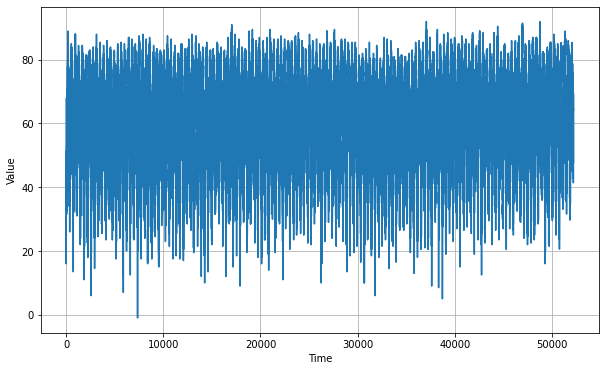

In [3]:
import csv
time_step = []
temps = []

with open('Birmingham-mean.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [4]:
split_time = 40000
time_train = time[:split_time] 
x_train = series[:split_time] 
time_valid = time[split_time:] 
x_valid = series[split_time:]

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [6]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [7]:
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
    tf.keras.layers.Dense(28, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])
history = model.fit(train_set, epochs=100, verbose=1)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(40000,)
Epoch 1/100
156/156 [==============================] - 4s 25ms/step - loss: 852.0253 - mae: 18.1580
Epoch 2/100
156/156 [==============================] - 4s 26ms/step - loss: 26.9847 - mae: 3.8621
Epoch 3/100
156/156 [==============================] - 4s 26ms/step - loss: 25.8343 - mae: 3.7778
Epoch 4/100
156/156 [==============================] - 4s 26ms/step - loss: 25.4955 - mae: 3.7521
Epoch 5/100
156/156 [==============================] - 4s 26ms/step - loss: 25.4142 - mae: 3.7467
Epoch 6/100
156/156 [==============================] - 4s 25ms/step - loss: 25.3718 - mae: 3.7442
Epoch 7/100
156/156 [==============================] - 4s 26ms/step - loss: 25.3452 - mae: 3.7423
Epoch 8/100
156/156 [==============================] - 4s 26ms/step - loss: 25.3280 - mae: 3.7417
Epoch 9/100
156/156 [==============================] - 4s 26ms/step - loss: 25.3206 - mae: 3.7419
Epoch 10/100


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 128)         512       
_________________________________________________________________
dense (Dense)                (None, None, 28)          3612      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          290       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
Total params: 4,425
Trainable params: 4,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

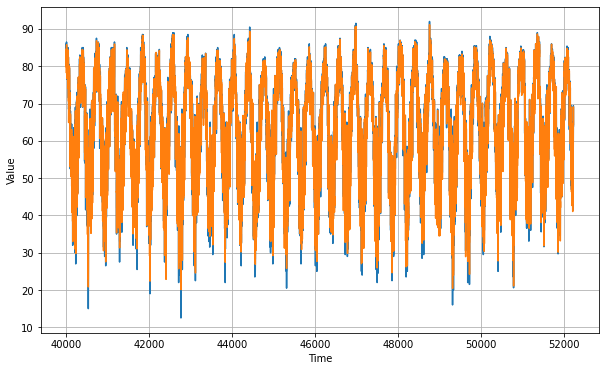

In [10]:
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [11]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

3.4801507

In [12]:
model.save('CNN_model.h5')

In [13]:
model = tf.keras.models.load_model('CNN_model.h5')

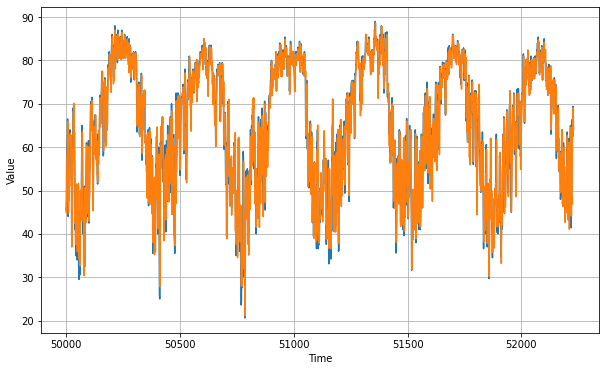

In [14]:
plt.figure(figsize=(10, 6))

time_valid1 = time_valid[10000:]
x_valid1 = x_valid[10000:]
results1 = results[10000:]
plot_series(time_valid1, x_valid1)
plot_series(time_valid1, results1)

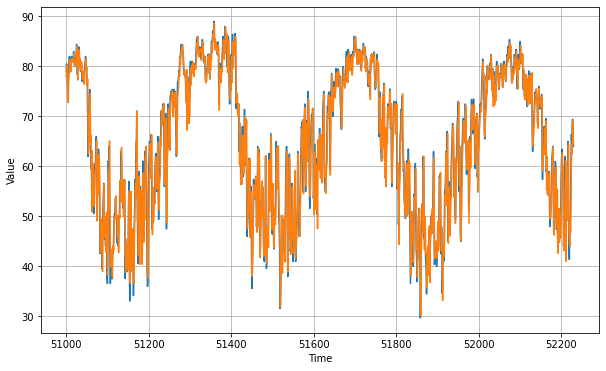

In [15]:
plt.figure(figsize=(10, 6))

time_valid2 = time_valid1[1000:]
x_valid2 = x_valid1[1000:]
results2 = results1[1000:]
plot_series(time_valid2, x_valid2)
plot_series(time_valid2, results2)

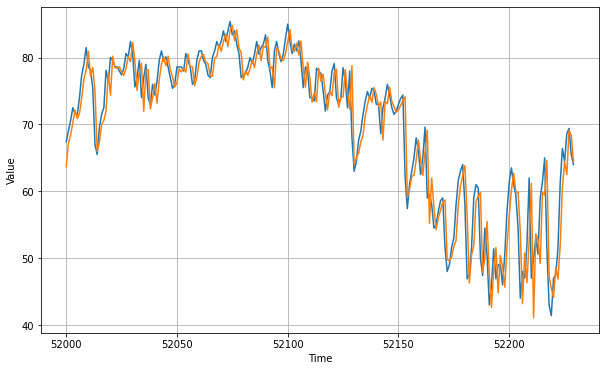

In [16]:
plt.figure(figsize=(10, 6))

time_valid3 = time_valid2[1000:]
x_valid3 = x_valid2[1000:]
results3 = results2[1000:]
plot_series(time_valid3, x_valid3)
plot_series(time_valid3, results3)

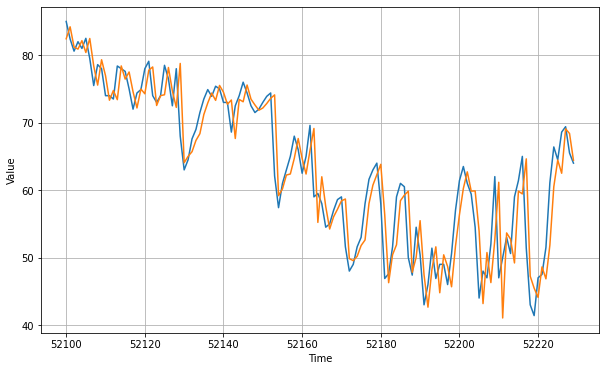

In [17]:
plt.figure(figsize=(10, 6))

time_valid4 = time_valid3[100:]
x_valid4 = x_valid3[100:]
results4 = results3[100:]
plot_series(time_valid4, x_valid4)
plot_series(time_valid4, results4)

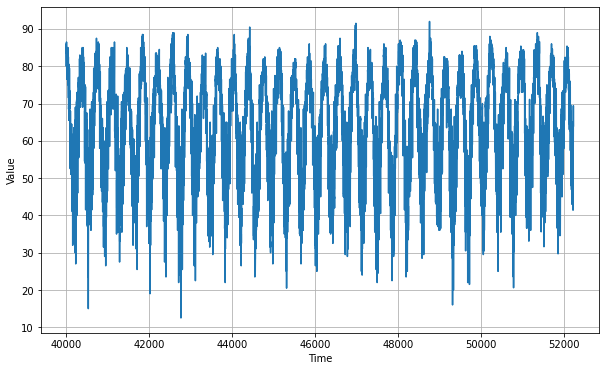

In [18]:
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)

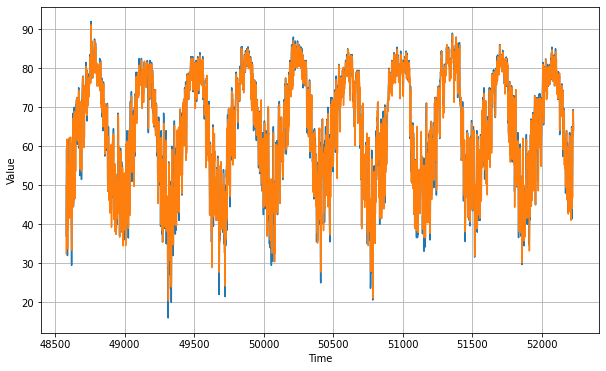

In [19]:
plt.figure(figsize=(10, 6))

time_valid5 = time_valid[8580:]
x_valid5 = x_valid[8580:]
results5 = results[8580:]
plot_series(time_valid5, x_valid5)
plot_series(time_valid5, results5)

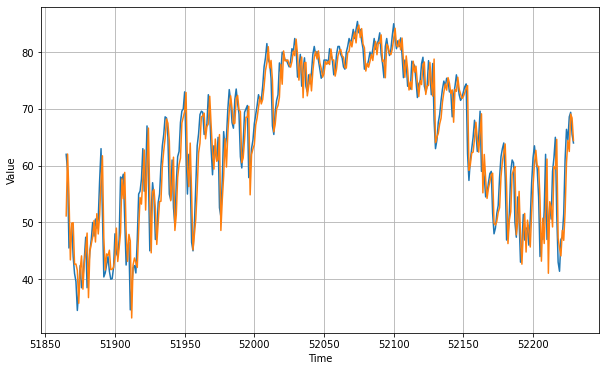

In [20]:
plt.figure(figsize=(10, 6))

time_valid6 = time_valid[11865:]
x_valid6 = x_valid[11865:]
results6 = results[11865:]
plot_series(time_valid6, x_valid6)
plot_series(time_valid6, results6)